## 차원 축소
* 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* 차원이 증가할 수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소한 구조를 가지며 예측 신뢰도가 떨어짐
* 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측 성능 저하
* 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음
* 차원 축소는 피처 선택과 피처 추출로 나눌 수 있음
* 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
* 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출. 기존의 피처가 압축된 것이므로 기존 피처와는 다른 값이 됨
* 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하며 PCA, SVD, NMF은 대표적인 차원 축소 알고리즘
- 간단 예시)
    - 모의고사 성적, 종합 내신 성적, 수능 성적, 봉사활동 점수, 대외활동 점수, 교내외 수상 경력  
    → 학업 성취도, 커뮤니케이션 능력, 문제 해결력 등 더 함축적인 요약 특성으로 추출

#### 선형대수식
* 크기와 방향을 가지고 있는 것을 vector,  
반면 크기만 있는 것(질량, 온도, 길이)을 scalar이라고 한다
* 고유벡터 : 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터  
$Ax = ax$ ($A$ 행렬, $x$ 고유벡터, $a$ 스칼라)
* 고유값(Eigenvalue) : 고유 벡터의 크기. 입력데이터의 분산
* 선형 변환 : 특정 벡터에 행렬  A를 곱해 새로운 벡터로 변환
* 공분산 행렬 : 두 변수간의 변동을 의미.  
공분산 $Cov(X,Y) > 0$ 은 $X$가 증가할 때 $Y$도 증가(같은 방향으로 움직임)
* 대칭행렬 : 고유벡터를 항상 직교행렬로, 고유값을 정방 행렬로 대각화할 수 있음
* 직교행렬 : 대각원소 이외의 모든 원소가 0일 때. 직교행렬의 역행렬은 직교행렬 자신의 전치행렬과 같음

#### LDA(Linear Discriminant Analysis)
* PCA와 매우 유사한 방식이며 PCA가 입력 데이터의 변동성(분산)이 가장 큰 축을 찾는데 반해  
LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소

#### SVD(Singular Value Decomposition), NMF(Non-Negative Matrix Factorization)
* 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법.
* 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델이나 추천 시스템에서 활발하게 사용
- SVD는 '특이값 분해'라고도 한다.  
    $A=U\sum V^T$

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris_ = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris = pd.DataFrame(iris_.data, columns = columns)
iris['target'] = iris_.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


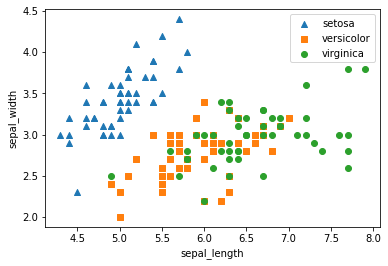

In [2]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = iris[iris.target==i]['sepal_length']
    y_axis_data = iris[iris.target==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris_.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
iris1 = iris.drop('target',axis=1)
scaled = StandardScaler().fit_transform(iris1)
iris1.shape

(150, 4)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(scaled)
print(iris_pca.shape)
# 성분 4개가 2개로 줄은 것을 확인

(150, 2)


In [5]:
pdf = pd.DataFrame(iris_pca, columns=['pca_1', 'pca_2'])
pdf['target'] = iris_.target
pdf.head()
# 보기 편하라고 target을 붙인 거지 차원축소는 비지도 학습임
# fit 자체를 X 데이터만 넣었잖음?

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


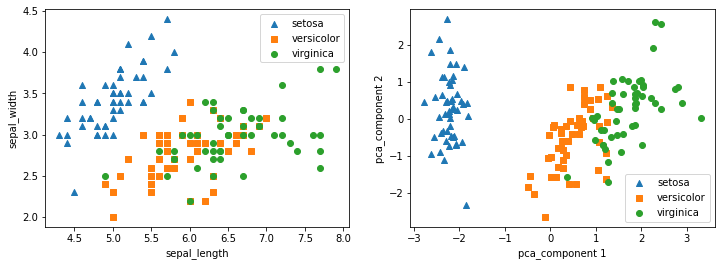

In [6]:
markers = ['^','s','o']
fig, (ax1, ax2) = plt.subplots(figsize=(12,4), ncols=2)
for i, marker in enumerate(markers):
    x_axis_data = iris[iris.target==i]['sepal_length']
    y_axis_data = iris[iris.target==i]['sepal_width']
    ax1.scatter(x_axis_data, y_axis_data, marker=marker, label=iris_.target_names[i])
ax1.set_xlabel('sepal_length')
ax1.set_ylabel('sepal_width')

for i, marker in enumerate(markers):
    x_axis_data = pdf[pdf.target==i]['pca_1']
    y_axis_data = pdf[pdf.target==i]['pca_2']
    ax2.scatter(x_axis_data, y_axis_data, marker=marker, label=iris_.target_names[i])
ax1.legend()
ax2.legend()
ax2.set_xlabel('pca_component 1')
ax2.set_ylabel('pca_component 2')
plt.show()

In [7]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

##### [과제] 신용카드 데이터 세트는 30000개의 레코드와 24개의 속성을 가지고 있으며 'default payment next month' 속성이 Target 값으로 연체일 경우 1, 정상납부가 0이다. 23개의 속성 데이터가 있으나 속성간 상관도가 높을 수 있으므로 통계 및 시각화를 통하여 상관도가 높은 속성을 PCA로 변환한 뒤 6개의 컴포넌트로 cross_val_score로 분류 예측을 수행하세요.(기존 속성을 적용하여 분류한 평가 결과와 비교)

In [9]:
!pip install openpyxl

In [10]:
df = pd.read_excel('./dataset/credit_card.xlsx',header=1, sheet_name='Data').iloc[0:,1:]
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
X = df.drop('default', axis=1)
y = df.default

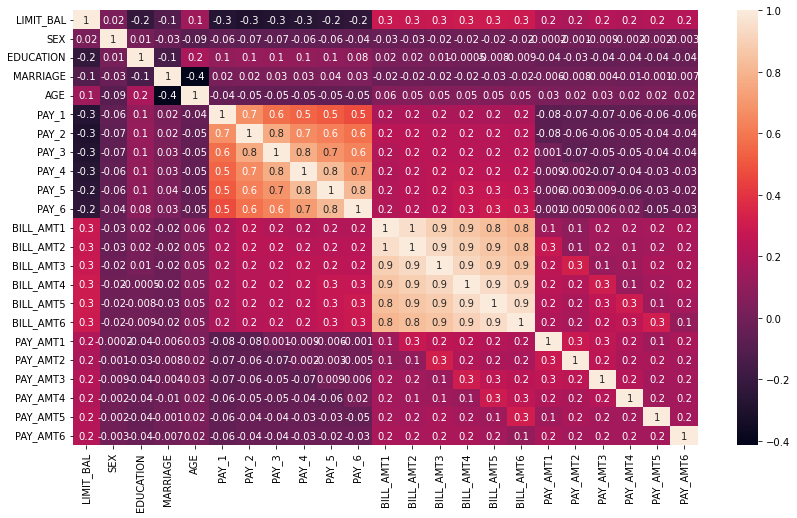

In [14]:
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
sns.heatmap(X.corr(), annot=True, fmt='.1g')
plt.show()

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
col = ['BILL_AMT'+str(i) for i in range(1,7)]
for i in range(1,7):
    col.append('PAY_'+str(i))

scaler = StandardScaler()
sdf = scaler.fit_transform(X[col])
pca = PCA(n_components=6)
pdf = pca.fit_transform(sdf)
col

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
score = cross_val_score(rf, pdf, y, scoring='accuracy', cv=3)
print(f'cv 3개의 개별 정확도: {score}')
print(f'평균 정확도: {score.mean():.4f}')

cv 3개의 개별 정확도: [0.7846 0.8006 0.8009]
평균 정확도: 0.7954


In [18]:
# 전체 데이터셋에 대한 정확도 측정
x = df.drop('default',axis=1)
scaler = StandardScaler()
x_ = scaler.fit_transform(x)
score = cross_val_score(rf, x_, y, scoring='accuracy', cv=3)
print(f'cv 3개의 개별 정확도: {score}')
print(f'평균 정확도: {score.mean():.4f}')

cv 3개의 개별 정확도: [0.8084 0.8206 0.821 ]
평균 정확도: 0.8167


In [19]:
# 12개 컬럼에 대한 정확도 측정(차원축소 안 힘)
score = cross_val_score(rf, sdf, y, scoring='accuracy', cv=3)
print(f'cv 3개의 개별 정확도: {score}')
print(f'평균 정확도: {score.mean():.4f}')

cv 3개의 개별 정확도: [0.797  0.8127 0.8134]
평균 정확도: 0.8077


In [23]:
print(pca.explained_variance_ratio_)
# 축소한 6개의 차원으로 변동성 설명할 수 있는 퍼센티지임
print(pca.explained_variance_ratio_.sum())
# 압축능도 좋고, 속성을 새로운 속성으로 변환했기 때문에 다중공선성 문제도 해결함

[0.52922611 0.28199562 0.0593879  0.03453087 0.02405356 0.02196055]
0.9511546099254553


다중공선성(多重共線性)문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 독립변수들간에 정확한 선형관계가 존재하는 완전공선성의 경우와 독립변수들간에 높은 선형관계가 존재하는 다중공선성으로 구분하기도 한다.